# K Means Clustering and KNN Project: Private vs. Public Universities


### The Universities Data:

We will use a data frame with 777 observations on the following 18 columns (features):
* Private: A factor with levels No and Yes indicating private or public university
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree
* S.F.Ratio: Student/faculty ratio
* perc.alumni: Pct. alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

**Note: we actually have the labels for this data set and we are going to use them for comparison to the known target label, but we will NOT use them for the KMeans clustering algorithm, since that is an Unsupervised Machine Learning algorithm.** In reality, we do not hava any labels, as this algorithms is merely used to make sense from data and produce clusters! 

Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the Data:

In [2]:
uni = pd.read_csv('../input/college-data/data.csv')

Check the head of the data:

In [3]:
uni.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


info and describe of data:

In [4]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [5]:
uni.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**Note:** seems that no data is missing, we can proceed!

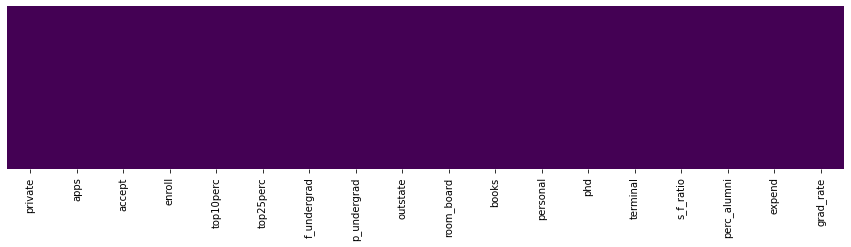

In [6]:
plt.figure(figsize=(15,3))
sns.heatmap(uni.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 1. Exploratory Data Analysis

Create a scatterplot of Grad.Rate versus Room.Board, hue by Private/Public ('Private' column):

In [7]:
# SEABORN SETTINGS
sns.set() # DEFAULTS
sns.set_style('whitegrid')
sns.set_palette("coolwarm")

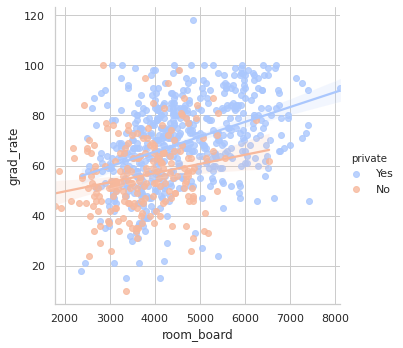

In [8]:
sns.lmplot('room_board','grad_rate',data=uni, hue='private',palette='coolwarm')

**Obs:** more correlation for the private Unis.

Create a scatterplot of F.undergrad versus Outstate, hue by Private/Public ('Private' column):

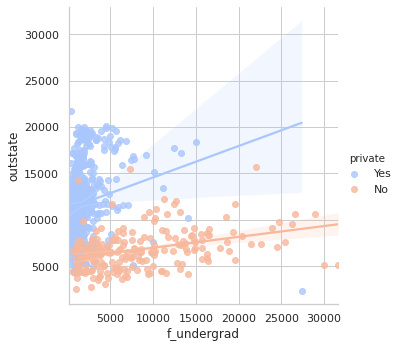

In [9]:
sns.lmplot('f_undergrad','outstate',data=uni, hue='private',palette='coolwarm')

**Obs:** more correlation for the private Unis.

Stacked histogram showing Out of State Tuition based on the Private column:

In [10]:
uni_priv=uni[uni['private']=='Yes']
uni_public=uni[uni['private']=='No']

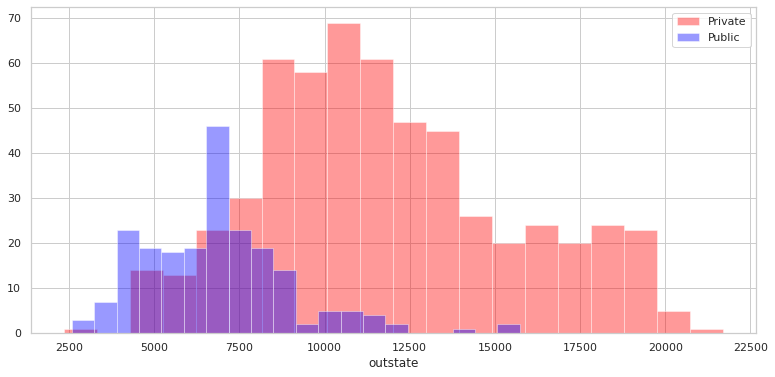

In [11]:
plt.figure(figsize=(13,6))
sns.distplot(uni_priv['outstate'],bins=20, kde=False,color='red',label='Private')
sns.distplot(uni_public['outstate'],bins=20, kde=False,color='blue',label='Public')
plt.legend()

Similar histogram for the Grad.Rate column:

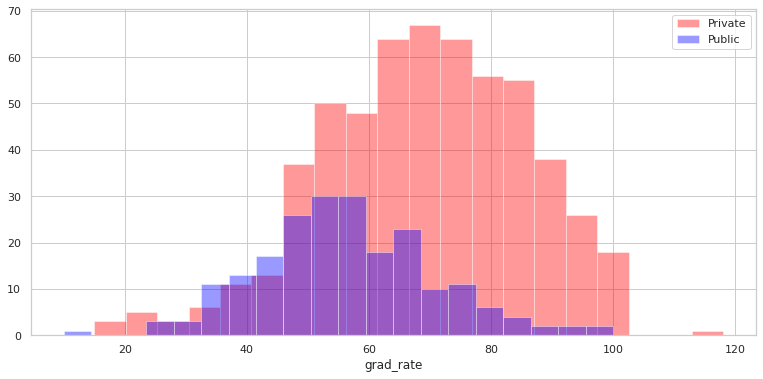

In [12]:
plt.figure(figsize=(13,6))
sns.distplot(uni_priv['grad_rate'],bins=20, kde=False,color='red',label='Private')
sns.distplot(uni_public['grad_rate'],bins=20, kde=False,color='blue',label='Public')
plt.legend()

**Obs:** there seems to be a private school with a graduation rate of higher than 100%. Which school is that?

In [13]:
uni[uni['grad_rate'] > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Set that school's graduation rate to 100%:

In [14]:
uni['grad_rate'].iloc[95]

118

In [15]:
uni['grad_rate'].iloc[95] = 100

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Replot the stacked histogram:

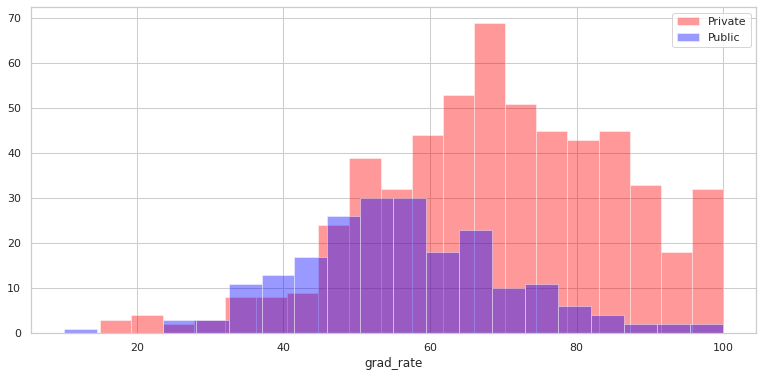

In [16]:
uni_priv=uni[uni['private']=='Yes']
uni_public=uni[uni['private']=='No']

plt.figure(figsize=(13,6))
sns.distplot(uni_priv['grad_rate'],bins=20, kde=False,color='red',label='Private')
sns.distplot(uni_public['grad_rate'],bins=20, kde=False,color='blue',label='Public')
plt.legend()

# 2. K Means Clustering Model

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
X=uni.drop('private', axis=1)
kmeans.fit(X)

KMeans(n_clusters=2)

What are the cluster center vectors?

In [18]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

The cluster labels predicted by the algorithm:

In [19]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Evaluation and Performance**:

Comparison to known target labels (Private column in the uni dataframe):

Assign the Private column Yes/No to 2 corresponding clusters 1/0 using LabelEncoder (can use Python apply function too):

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
uni['Cluster'] = labelencoder.fit_transform(uni['private'])

In [21]:
uni.head(5)

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


Confusion matrix and Classification report:

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(uni['Cluster'],kmeans.labels_))
print(classification_report(uni['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



# 3. KNNeighbours Model

Using the same dataset, let's try to predict labels in the 'Private' column using KNN:

In [23]:
uni = pd.read_csv('../input/college-data/data.csv')
uni.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


LabelEncoding the 'Private' Column with Python CATCODES (same as LabelEncoding):

In [24]:
uni['private']=uni['private'].astype('category').cat.codes
uni['private']

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: private, Length: 777, dtype: int8

In [25]:
uni.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Standardize features (X) for better performance:

In [26]:
X=uni.drop('private',axis=1)
y=uni['private'] # OUR TARGET LABEL for predictions

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_std=scaler.transform(X) # numpy array here

#Create new X dataframe
X_2=pd.DataFrame(X_std, columns=uni.drop('private',axis=1).columns)
X_2.head()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


Train test split on standardized X and y (target labels):

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.33, random_state=42)

### KNN Model building:

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [30]:
pred = knn.predict(X_test)

### Predictions and evaluation:

In [31]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 58   9]
 [ 18 172]]


              precision    recall  f1-score   support

           0       0.76      0.87      0.81        67
           1       0.95      0.91      0.93       190

    accuracy                           0.89       257
   macro avg       0.86      0.89      0.87       257
weighted avg       0.90      0.89      0.90       257



### Choosing an optimal K value:

Loop for both **Error Rate vs K** and **Accuracy Score vs K** for optimal choice of K:

In [32]:
error_rate = []
scores = []

for i in range(1,40): # check all values of K between 1 and 40
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score=accuracy_score(y_test,pred_i)
    scores.append(score)
    error_rate.append(np.mean(pred_i != y_test)) # ERROR RATE DEF and add it to the list

Text(0, 0.5, 'Error Rate')

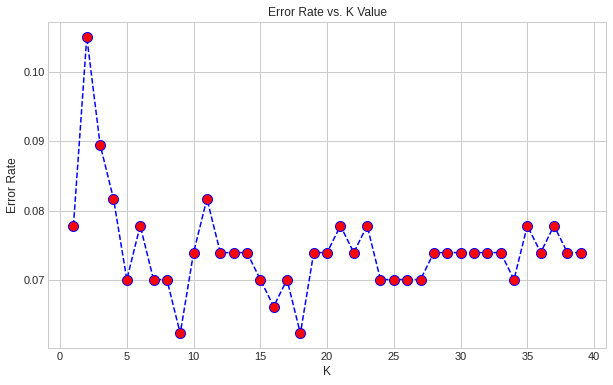

In [33]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy Score')

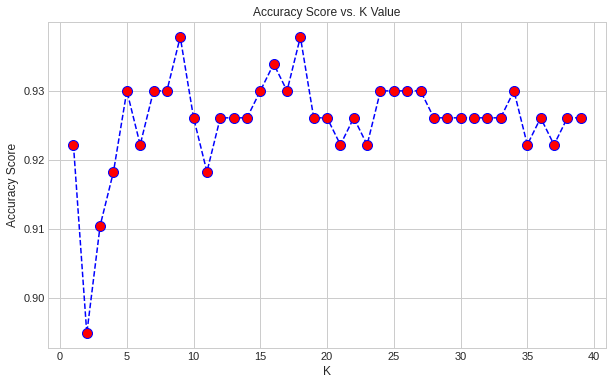

In [34]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

**Obs:** K=7 choice.

### Retraining with K=7:

In [35]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [36]:
pred_7 = knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred_7))
print('\n')
print(classification_report(y_test,pred_7))

[[ 56  11]
 [  7 183]]


              precision    recall  f1-score   support

           0       0.89      0.84      0.86        67
           1       0.94      0.96      0.95       190

    accuracy                           0.93       257
   macro avg       0.92      0.90      0.91       257
weighted avg       0.93      0.93      0.93       257



### Obs: accuracy went up by 3% on all categories, and ammount of FalsePos and FalseNeg decreased significantly!